In [1]:
%matplotlib inline
import pandas as pd
import ast
ted = pd.read_csv("ted_main.csv")

In [2]:
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [3]:
ted.describe()

,comments,duration,film_date,languages,num_speaker,published_date,views
count,2550.000000,2550.000000,2.550000e+03,2550.000000,2550.000000,2.550000e+03,2.550000e+03
mean,191.562353,826.510196,1.321928e+09,27.326275,1.028235,1.343525e+09,1.698297e+06
std,282.315223,374.009138,1.197391e+08,9.563452,0.207705,9.464009e+07,2.498479e+06
min,2.000000,135.000000,7.464960e+07,0.000000,1.000000,1.151367e+09,5.044300e+04
25%,63.000000,577.000000,1.257466e+09,23.000000,1.000000,1.268463e+09,7.557928e+05
50%,118.000000,848.000000,1.333238e+09,28.000000,1.000000,1.340935e+09,1.124524e+06
75%,221.750000,1046.750000,1.412964e+09,33.000000,1.000000,1.423432e+09,1.700760e+06
max,6404.000000,5256.000000,1.503792e+09,72.000000,5.000000,1.506092e+09,4.722711e+07


In [4]:
ted["views"].mean()

1698297.4815686275

In [5]:
ted.corr()

,comments,duration,film_date,languages,num_speaker,published_date,views
comments,1.000000,0.140694,-0.133303,0.318284,-0.035489,-0.185936,0.530939
duration,0.140694,1.000000,-0.242941,-0.295681,0.022257,-0.166324,0.048740
film_date,-0.133303,-0.242941,1.000000,-0.061957,0.040227,0.902565,0.006447
languages,0.318284,-0.295681,-0.061957,1.000000,-0.063100,-0.171836,0.377623
num_speaker,-0.035489,0.022257,0.040227,-0.063100,1.000000,0.049240,-0.026389
published_date,-0.185936,-0.166324,0.902565,-0.171836,0.049240,1.000000,-0.017920
views,0.530939,0.048740,0.006447,0.377623,-0.026389,-0.017920,1.000000


In [6]:
# Total count for each rating. Most talks pick up the inspiring rating.

import operator
ratings = {}
for index, rating_str in ted["ratings"].iteritems():
    ratings_list = ast.literal_eval(rating_str)
    for rating in ratings_list:
        ratings[rating["name"]] = ratings.get(rating["name"], 0) + rating["count"]
for i in sorted(ratings.items(), key=operator.itemgetter(1)):
    print(i)

('Confusing', 53436)
('Obnoxious', 66303)
('Longwinded', 83344)
('Unconvincing', 134558)
('OK', 207157)
('Jaw-dropping', 377547)
('Ingenious', 384386)
('Funny', 393895)
('Courageous', 420045)
('Beautiful', 490349)
('Persuasive', 561220)
('Fascinating', 801119)
('Informative', 887434)
('Inspiring', 1352048)


In [7]:
# Adding columns with counts for all ratings for a talk.

ratings_df = ted.copy()
ratings_list = ratings.keys()
for rating in ratings_list:
    ratings_df[rating] = 0

In [8]:
# Speakers with more than 1 talk.

import operator
name_dict = {}
for name in ted["main_speaker"].iteritems():
    name_dict[name[1]] = name_dict.get(name[1], 0) + 1
count = 0
for k in sorted(name_dict.items(), key = operator.itemgetter(1)):
    if k[1] > 1:
        print ("%s - %s" % (k[0], k[1]))

Majora Carter - 2
Julia Sweeney - 2
Joshua Prince-Ramus - 2
Cameron Sinclair - 2
Larry Brilliant - 2
David Deutsch - 2
Steven Levitt - 2
Bono - 2
Edward Burtynsky - 2
Michael Shermer - 2
Richard St. John - 2
Robert Neuwirth - 2
Wade Davis - 2
Martin Rees - 2
Robert Wright - 2
Charles Leadbeater - 2
Saul Griffith - 2
E.O. Wilson - 2
James Nachtwey - 2
Jane Goodall - 2
Alex Steffen - 2
Nick Bostrom - 2
Janine Benyus - 2
Golan Levin - 2
Frans Lanting - 2
Jeff Bezos - 2
Eddi Reader - 2
Natalie MacMaster - 2
David Kelley - 2
Robert Thurman - 2
Jonathan Harris - 2
William Kamkwamba - 2
Chris Abani - 2
Vusi Mahlasela - 2
Erin McKean - 2
Stephen Petranek - 2
Paul MacCready - 2
Carolyn Porco - 2
Sherwin Nuland - 2
Matthieu Ricard - 2
Paul Rothemund - 2
Murray Gell-Mann - 2
Amory Lovins - 2
Gever Tulley - 2
Isabel Allende - 2
Deborah Gordon - 2
Frank Gehry - 2
Raul Midon - 2
Robin Chase - 2
George Dyson - 2
Moshe Safdie - 2
Karen Armstrong - 2
Rokia Traore - 2
David Hoffman - 2
Brian Greene - 2


In [9]:
# Set of all tags

tag_set = set()
for tag_str in ted["tags"]:
    tag_list = ast.literal_eval(tag_str)
    for tag in tag_list:
        tag_set.add(tag)
print(tag_set)

{'religion', 'iraq', 'medicine', 'animals', 'String theory', 'investment', 'nanoscale', 'exploration', 'sound', 'TED Residency', 'spoken word', 'trust', 'South America', 'government', 'nature', 'NASA', 'love', 'work-life balance', 'visualizations', 'social change', 'nuclear weapons', 'money', 'industrial design', 'business', 'architecture', 'literature', 'dark matter', 'advertising', 'consciousness', 'telescopes', 'conducting', 'TED Brain Trust', 'population', 'Europe', 'God', 'biotech', 'Autism spectrum disorder', 'state-building', 'technology', 'mission blue', 'Middle East', 'LGBT', 'pain', 'AIDS', 'Blindness', 'physiology', 'performance', 'gender', 'Syria', 'Guns', 'glacier', 'bacteria', 'TEDMED', 'ancient world', '3d printing', 'cello', 'Moon', 'women in business', 'data', 'movies', 'alternative energy', 'behavioral economics', 'nonviolence', 'parenting', 'computers', 'immigration', 'cities', 'animation', 'sociology', 'humanity', 'Slavery', 'inequality', 'Iran', 'heart health', 'hu

In [10]:
# Print tags per talk of speaker.

def print_tags_for_speaker(speaker):
    rosling = ted[ted["main_speaker"] == speaker]
    tag_set = []
    for tag_str in rosling["tags"]:
        tag_list = ast.literal_eval(tag_str)
        tag_set.append(tag_list)
    print(tag_set)

print_tags_for_speaker("Hans Rosling")
# print_tags_for_speaker("Juan Enriquez")

[['Africa', 'Asia', 'Google', 'demo', 'economics', 'global development', 'global issues', 'health', 'math', 'statistics', 'visualizations'], ['Africa', 'Asia', 'Google', 'economics', 'global development', 'global issues', 'health', 'inequality', 'poverty', 'statistics', 'visualizations'], ['AIDS', 'Africa', 'disease', 'global issues', 'presentation', 'statistics', 'visualizations'], ['Africa', 'Asia', 'data', 'global development', 'global issues', 'math', 'medicine', 'presentation', 'science', 'statistics', 'technology', 'visualizations'], ['Asia', 'economics', 'health', 'india', 'statistics', 'technology', 'visualizations'], ['culture', 'data', 'demo', 'global issues', 'poverty', 'prediction', 'presentation'], ['Africa', 'TEDx', 'data', 'global development', 'health', 'inequality', 'statistics'], ['culture', 'data', 'economics', 'women'], ['TEDx', 'data', 'global issues', 'population', 'presentation', 'religion']]


In [11]:
# Most viewed talks.

most_viewed = ted[["title", "main_speaker", "views"]].sort_values("views", ascending=False)
most_viewed.head()

,title,main_speaker,views
0,Do schools kill creativity?,Ken Robinson,47227110
1346,Your body language may shape who you are,Amy Cuddy,43155405
677,How great leaders inspire action,Simon Sinek,34309432
837,The power of vulnerability,Brené Brown,31168150
452,10 things you didn't know about orgasm,Mary Roach,22270883


In [12]:
# Most commented on talks

most_commented = ted[["title", "main_speaker", "views", "comments"]].sort_values("comments", ascending=False)
most_commented.head()

,title,main_speaker,views,comments
96,Militant atheism,Richard Dawkins,4374792,6404
0,Do schools kill creativity?,Ken Robinson,47227110,4553
644,Science can answer moral questions,Sam Harris,3433437,3356
201,My stroke of insight,Jill Bolte Taylor,21190883,2877
1787,How do you explain consciousness?,David Chalmers,2162764,2673


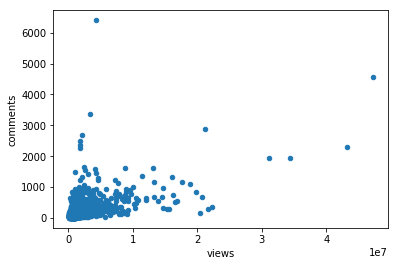

In [13]:
# There doesn't seem to be any correlation between views and comments. The top viewed TED talk is not the top commented 
# inspite of having 10 times more views than the top commented one "Militant Atheism".

ted.plot(x = "views", y = "comments", kind = "scatter")

262    28
Name: languages, dtype: int64

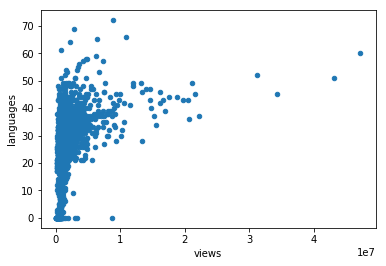

In [14]:
# We observe that views and languages are slightly positively correlated 0.3, TED talks with more than 10 million 
# have atleast 28 languages

ted.plot(x = "views", y = "languages", kind = "scatter")
ted[ted["views"] > 10000000].languages.sort_values().head(1)

In [15]:
# Each rating with the associated score for each talk normalized over the number of views. 

def populate_ratings():
    for index, rating_str in ratings_df["ratings"].iteritems():
        max_rating = -1
        ratings_list = ast.literal_eval(rating_str)
        for rating in ratings_list:
            ratings_df.loc[index, rating["name"]] = rating["count"] / ted.iloc[index]["views"]
populate_ratings()

In [16]:
display_list = ["title", "main_speaker"] + list(ratings_list)
ratings_df[display_list].head()

,title,main_speaker,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring
0,Do schools kill creativity?,Ken Robinson,0.000416,0.000097,0.000129,0.000069,0.000008,0.000005,0.000156,0.000224,0.000006,0.000227,0.000094,0.000025,0.000004,0.000528
1,Averting the climate crisis,Al Gore,0.000170,0.000018,0.000017,0.000043,0.000035,0.000019,0.000138,0.000041,0.000081,0.000084,0.000036,0.000063,0.000041,0.000129
2,Simplicity sells,David Pogue,0.000589,0.000037,0.000112,0.000028,0.000048,0.000017,0.000241,0.000101,0.000064,0.000141,0.000033,0.000089,0.000087,0.000141
3,Greening the ghetto,Majora Carter,0.000035,0.000171,0.000062,0.000448,0.000031,0.000019,0.000224,0.000078,0.000021,0.000271,0.000135,0.000050,0.000021,0.000630
4,The best stats you've ever seen,Hans Rosling,0.000116,0.000078,0.000267,0.000026,0.000009,0.000006,0.000453,0.000384,0.000006,0.000212,0.000311,0.000021,0.000005,0.000241


In [17]:
from IPython.display import display
for rating in ratings_list:
    display(ratings_df.sort_values(by = rating, ascending = False)[["title", rating, "views"]].head(5))
    
# This gives us a more accurate description of whether the talk was funny/inspiring etc. This is per user how many 
# people found it funny as opposed to overall coz it may be biased for a talk with more views.

,title,Funny,views
675,"Lies, damned lies and statistics (about TEDTalks)",0.002509,2212944
941,Gotta share!,0.002056,357454
194,Juggle and jest,0.002027,807628
1341,An animated tour of the invisible,0.001962,336430
764,This is broken,0.001696,955329


,title,Beautiful,views
972,Building a park in the sky,0.009493,704205
237,"""Kounandi""",0.004001,82488
1193,The secret life of plankton,0.001933,197120
209,"""M'Bifo""",0.001770,294936
791,A message to gay teens: It gets better,0.001762,278672


,title,Ingenious,views
1324,Brilliant designs to fit more people in every ...,0.001482,1052980
1230,3 new ways to kill mosquitoes,0.001394,264684
1126,What happens inside those massive warehouses?,0.001312,276779
1125,Hedonistic sustainability,0.001236,422460
803,E-voting without fraud,0.001133,543551


,title,Courageous,views
791,A message to gay teens: It gets better,0.004500,278672
1087,What happens when an NGO admits failure,0.002507,221777
1301,When a reporter becomes the story,0.002180,144044
914,"Transplant cells, not organs",0.001830,620231
744,The case for same-sex marriage,0.001717,292395


,title,Longwinded,views
1179,Victims of the city,0.000626,142164
481,17 words of architectural inspiration,0.000570,784642
431,Rethinking the way we sit down,0.000422,554650
947,Authentic creativity vs. karaoke culture,0.000422,251313
1079,Don't misrepresent Africa,0.000371,121186


,title,Confusing,views
494,I believe we evolved from aquatic apes,0.000511,1038576
481,17 words of architectural inspiration,0.000311,784642
1198,"""Put the financial aid in the bag""",0.000306,186308
1106,Be suspicious of simple stories,0.000288,277326
311,An 8-dimensional model of the universe,0.000252,1491698


,title,Informative,views
776,The early birdwatchers,0.001469,112321
2171,Why gun violence can't be our new normal,0.001409,1096198
1087,What happens when an NGO admits failure,0.001326,221777
1212,Just how small is an atom?,0.001318,419672
1111,"Thorium, an alternative nuclear fuel",0.001276,390395


,title,Fascinating,views
1193,The secret life of plankton,0.002039,197120
1173,Deep ocean mysteries and wonders,0.001686,277544
1044,The divided brain,0.001624,648251
1171,The cockroach beatbox,0.001316,303986
1341,An animated tour of the invisible,0.001296,336430


,title,Unconvincing,views
494,I believe we evolved from aquatic apes,0.002113,1038576
1060,6 ways to save the internet,0.001155,287416
481,17 words of architectural inspiration,0.001128,784642
2314,Enough with the fear of fat,0.000780,1594248
464,The world in 2200,0.000761,493966


,title,Persuasive,views
2171,Why gun violence can't be our new normal,0.002759,1096198
744,The case for same-sex marriage,0.002657,292395
128,Aid versus trade,0.002383,524049
1093,My subversive (garden) plot,0.001718,191555
160,A critical look at geoengineering against clim...,0.001542,876658


,title,Jaw-dropping,views
108,How PhotoSynth can connect the world's images,0.003086,4772595
148,This is Saturn,0.001892,2627709
117,New insights on poverty,0.001584,3243784
137,"Luke, a new prosthetic arm for soldiers",0.001320,1575699
16,"Improvising on piano, aged 14",0.001226,1628912


,title,OK,views
1104,"Change our culture, change our world",0.000440,125050
1198,"""Put the financial aid in the bag""",0.000435,186308
1191,Inventing is the easy part. Marketing takes work,0.000432,208115
590,What Bernie Madoff couldn't steal from me,0.000427,149818
1486,How much does a video weigh?,0.000419,195899


,title,Obnoxious,views
481,17 words of architectural inspiration,0.001735,784642
494,I believe we evolved from aquatic apes,0.000993,1038576
817,Protecting the brain against concussion,0.000652,452578
1198,"""Put the financial aid in the bag""",0.000649,186308
941,Gotta share!,0.000610,357454


,title,Inspiring,views
914,"Transplant cells, not organs",0.006747,620231
791,A message to gay teens: It gets better,0.003387,278672
1301,When a reporter becomes the story,0.002923,144044
2171,Why gun violence can't be our new normal,0.002819,1096198
1916,Why we all need to practice emotional first aid,0.002688,4984884


In [18]:
ratings_df[list(ratings_list)].corr()

,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring
Funny,1.000000,0.021137,0.219400,-0.014976,0.103443,0.141540,0.042082,0.166617,0.059780,0.027065,0.040614,0.254693,0.217127,0.060972
Beautiful,0.021137,1.000000,0.041143,0.203846,0.005912,0.026498,-0.111481,0.184077,-0.027351,-0.026977,0.159512,0.075770,0.017257,0.313445
Ingenious,0.219400,0.041143,1.000000,-0.076649,0.063479,0.138951,0.204949,0.504996,0.062792,0.111915,0.375057,0.144391,0.057970,0.146510
Courageous,-0.014976,0.203846,-0.076649,1.000000,0.029352,0.037211,0.068475,-0.039276,0.076454,0.358521,0.132765,0.027676,0.099149,0.641771
Longwinded,0.103443,0.005912,0.063479,0.029352,1.000000,0.570625,0.229950,0.135708,0.492779,0.204017,0.024601,0.593701,0.470467,0.085221
Confusing,0.141540,0.026498,0.138951,0.037211,0.570625,1.000000,0.180586,0.203047,0.685530,0.146541,0.067215,0.538857,0.583076,0.010656
Informative,0.042082,-0.111481,0.204949,0.068475,0.229950,0.180586,1.000000,0.525218,0.190381,0.567289,0.163203,0.320464,0.069371,0.126041
Fascinating,0.166617,0.184077,0.504996,-0.039276,0.135708,0.203047,0.525218,1.000000,0.072579,0.139275,0.490626,0.205983,0.056272,0.214565
Unconvincing,0.059780,-0.027351,0.062792,0.076454,0.492779,0.685530,0.190381,0.072579,1.000000,0.266378,0.000985,0.496356,0.667337,0.040643
Persuasive,0.027065,-0.026977,0.111915,0.358521,0.204017,0.146541,0.567289,0.139275,0.266378,1.000000,0.096740,0.210690,0.141379,0.427816


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1139552b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x118122128>]], dtype=object)

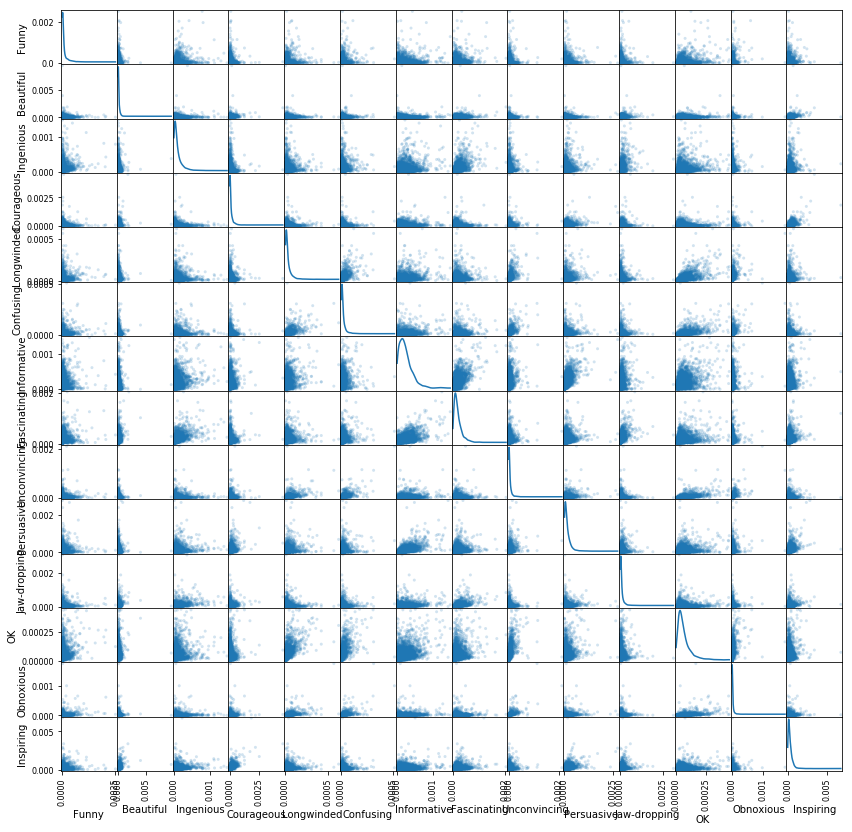

In [19]:
from pandas.plotting import scatter_matrix
scatter_matrix(ratings_df[list(ratings_list)], alpha=0.2, figsize=(14, 14), diagonal='kde')

# We were expecting positive correlation between some ratings which we were able to verify. 
# Didn't seem to find any negative correlation which was surprising.

In [20]:
# seaborn pairplot